In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.metrics
import csv

def normalize_Xtrain(X_train):
    mn = []
    mx = []
    Xn_train = np.zeros(np.shape(X_train))
    X_norm = np.zeros(np.shape(X_train))
    for i in range(len(X_train[0, ::])):
        mn.append(np.min(X_train[::, i]))
        Xn_train[::, i] = X_train[::, i] - mn[i]
    for i in range(len(X_train[0, ::])):
        mx.append(np.max(Xn_train[::, i]))
        if mx[i] == 0:
            X_norm[::, i] = 0
        if mx[i] != 0:
            X_norm[::, i] = Xn_train[::, i]/mx[i]
            
    return X_norm, mx, mn

Model precision is:  0.5796296296296296
Model weighted precision is:  0.6883838383838384

Model recall is:  0.6239393939393939
Model weighted recall is:  0.6909090909090909

Model f1_score is:  0.5961250953470633
Model weighted f1_score is:  0.6846099438319118

Model MSE is:  0.3090909090909091

The accuracy of  Judge_1  within 1 is:  1.0

Model unweighted precision is:  1.0
Model weighted precision is:  1.0

Model unweighted recall is:  1.0
Model weighted recall is:  1.0

Model unweighted f1_score is:  1.0
Model weighted f1_score is:  1.0

Model MSE is:  0.0

Model precision is:  0.7666666666666666
Model weighted precision is:  0.7232323232323232

Model recall is:  0.4907575757575757
Model weighted recall is:  0.6363636363636364

Model f1_score is:  0.47506072874493926
Model weighted f1_score is:  0.6275082811924917

Model MSE is:  0.36363636363636365

The accuracy of  Judge_2  within 1 is:  1.0

Model unweighted precision is:  1.0
Model weighted precision is:  1.0

Model unweighted r

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zacha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zacha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zacha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is 

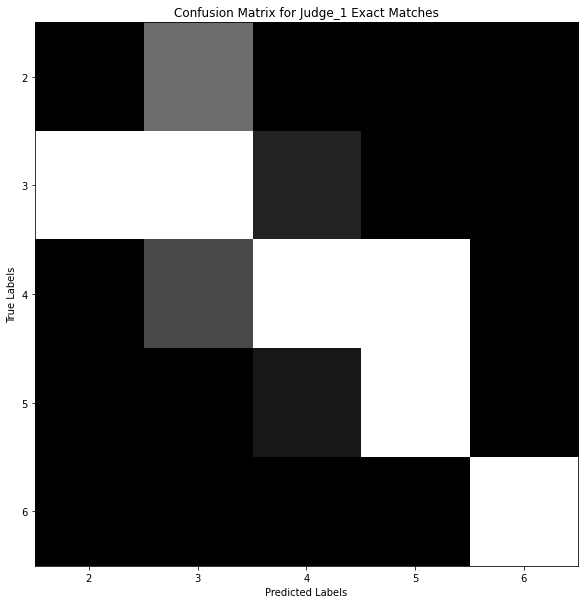

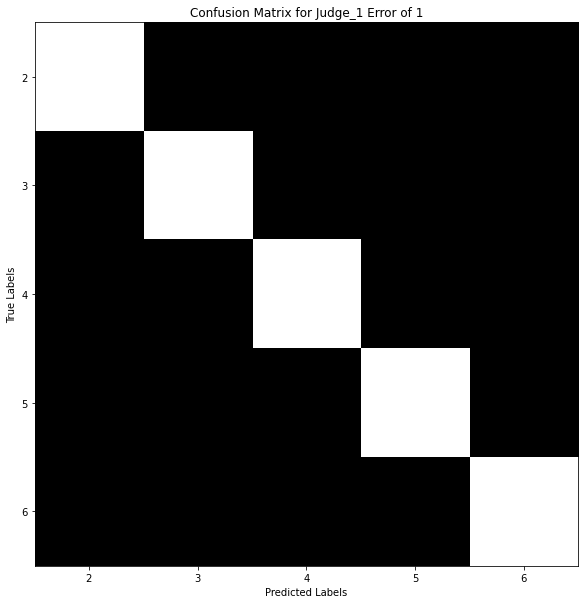

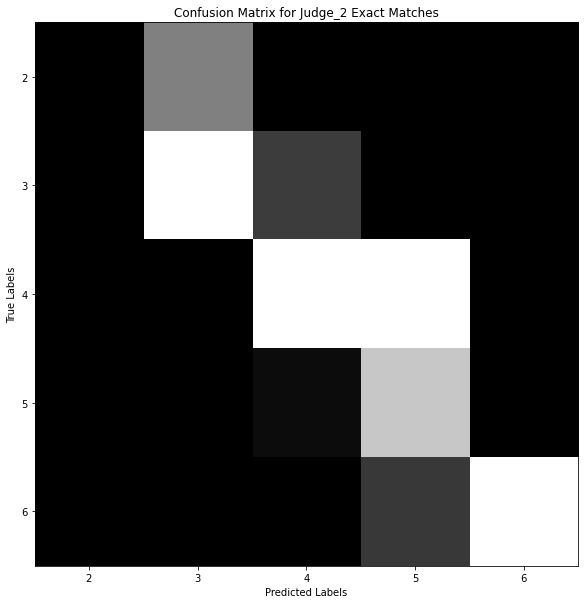

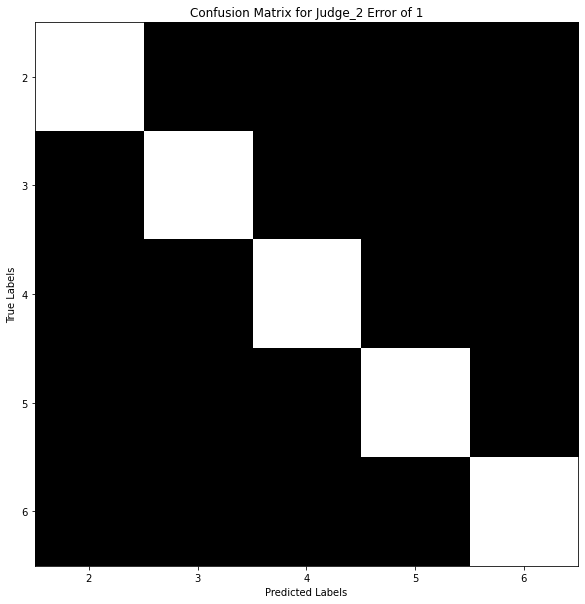

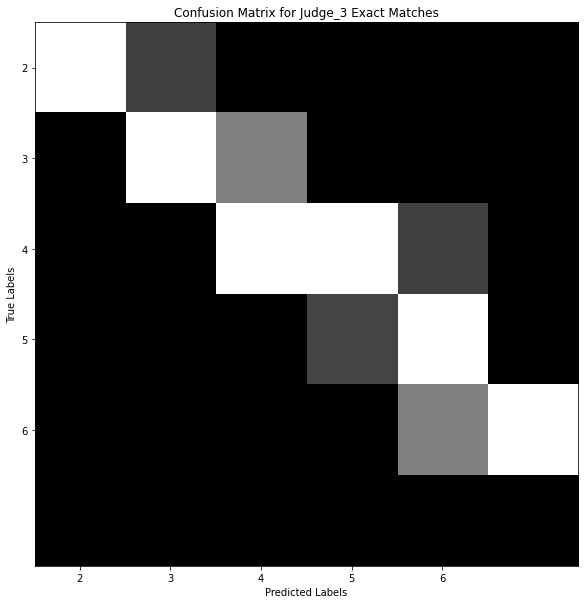

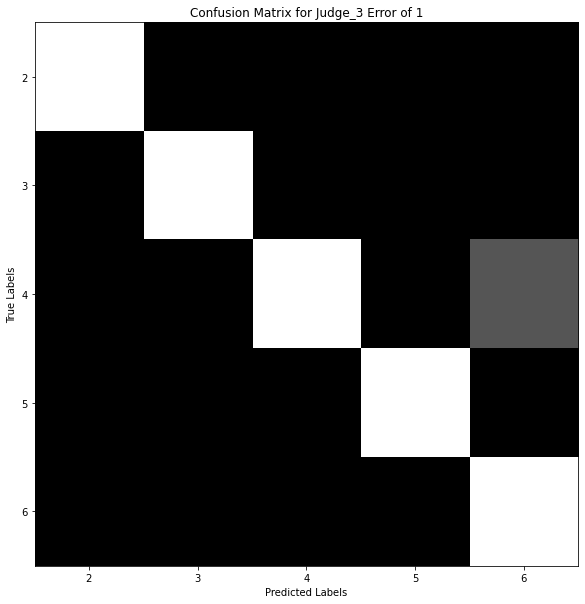

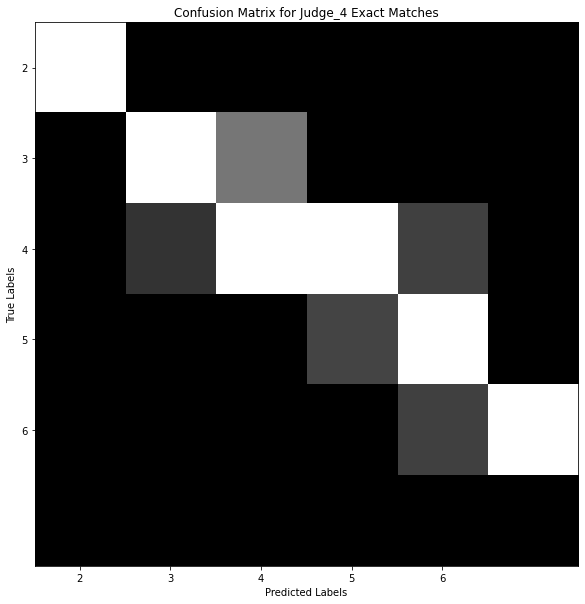

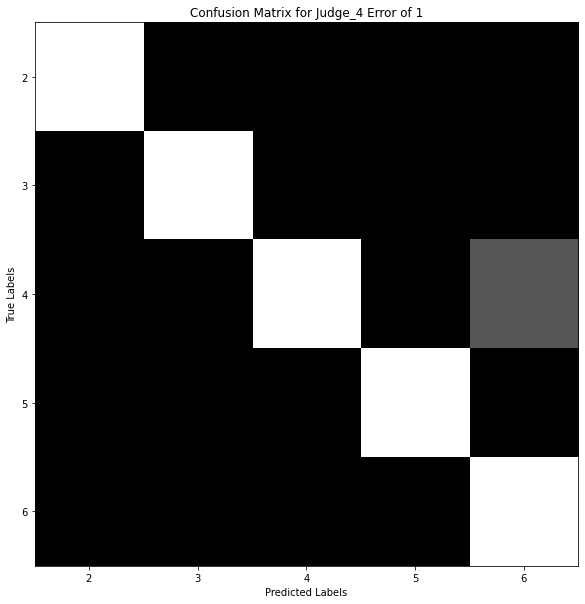

In [10]:
andrew = [4,5,5,3,3,4,4,4,4,4,3,3,5,3,4,4,4,6,5,4,4,4,4,5,5,2,4,5,5,4,4,4,4,3,4,5,4,5,4,6,4,3,4,3,4,3,3,3,4,5,4,6,3,5,4]
rob = [4,5,5,3,3,4,5,4,5,4,3,4,4,4,4,4,5,6,5,4,4,4,4,5,5,3,4,5,5,4,4,5,4,4,4,5,5,5,5,5,4,3,4,4,4,3,3,3,4,4,4,5,3,5,4]
micah = [4,4,5,4,2,4,4,4,4,4,2,3,5,3,5,4,4,6,4,5,5,3,4,4,6,4,5,5,4,4,5,5,4,5,6,6,5,5,5,6,5,4,5,5,5,3,4,4,4,5,5,7,3,6,6]
santiago = [3,4,5,4,2,5,4,4,3,4,2,3,5,3,5,3,4,6,4,5,5,3,5,5,5,4,5,5,5,4,4,6,5,6,6,6,5,6,4,7,4,4,5,4,5,2,4,4,4,5,4,7,4,5,5]
y_test = [3,4,5,3,2,4,4,4,4,4,2,3,4,3,4,3,4,6,4,4,4,3,4,4,5,3,4,5,4,4,4,5,4,4,5,5,4,5,4,6,4,3,4,4,4,2,3,3,4,4,4,6,3,5,4]

model_type = 'Judges'
judges = [andrew, rob, micah, santiago]
names = ['Judge_1', 'Judge_2', 'Judge_3', 'Judge_4']

with open(model_type+'_stats.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Model', 'Accuracy', 'Precision', 'Weighted Precision', 'Recall', 'Weighted Recall', 'F1 Score', 'Weighted F1 Score', 'MSE'])

with open(model_type+'_stats_within_1.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Model', 'Accuracy', 'Precision', 'Weighted Precision', 'Recall', 'Weighted Recall', 'F1 Score', 'Weighted F1 Score', 'MSE'])

    
for i in range(0, len(judges)):
    name = names[i]
    y_test_hat = judges[i]
    con_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_hat)
    acc=np.diag(con_matrix).sum().astype(float)/con_matrix.sum()

    min = np.min(con_matrix)
    max = np.max(con_matrix)
    temp_mat = con_matrix - min
    temp_mat = con_matrix/max

    plt.figure(figsize=(10,10))
    plt.imshow(normalize_Xtrain(con_matrix)[0], cmap='gray')
    plt.title('Confusion Matrix for '+ name + ' Exact Matches')
    plt.xticks(list(range(len(['2', '3', '4', '5', '6']))), ['2', '3', '4', '5', '6'])
    plt.yticks(list(range(len(['2', '3', '4', '5', '6']))), ['2', '3', '4', '5', '6'])
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')

    #Metrics
    precision = sklearn.metrics.precision_score(y_test,y_test_hat, average='macro', zero_division=1)
    print('Model precision is: ', precision)
    precision_weighted = sklearn.metrics.precision_score(y_test,y_test_hat, average='weighted', zero_division=1)
    print('Model weighted precision is: ', precision_weighted)
    print()

    recall = sklearn.metrics.recall_score(y_test,y_test_hat, average='macro')
    print('Model recall is: ', recall)
    recall_weighted = sklearn.metrics.recall_score(y_test,y_test_hat, average='weighted')
    print('Model weighted recall is: ', recall_weighted)
    print()

    f1_score = sklearn.metrics.f1_score(y_test,y_test_hat, average='macro')
    print('Model f1_score is: ', f1_score)
    f1_score_weighted = sklearn.metrics.f1_score(y_test,y_test_hat, average='weighted')
    print('Model weighted f1_score is: ', f1_score_weighted)
    print()


    MSE = sklearn.metrics.mean_squared_error(y_test,y_test_hat)
    print('Model MSE is: ', MSE)
    print()


    y_within_1 = []
    for i in range(0, len(y_test)):
        if ((y_test_hat[i] == y_test[i]+1) or (y_test_hat[i] == y_test[i]-1) or (y_test_hat[i] == y_test[i])):
            y_within_1.append(y_test[i])
        else:
            y_within_1.append(y_test_hat[i])


    con_matrix = sklearn.metrics.confusion_matrix(y_test,y_within_1)
    acc_1=np.diag(con_matrix).sum().astype(float)/con_matrix.sum()


    print('The accuracy of ', name, ' within 1 is: ', acc_1)
    print()

    min = np.min(con_matrix)
    max = np.max(con_matrix)
    temp_mat = con_matrix - min
    temp_mat = con_matrix/max

    plt.figure(figsize=(10,10))
    plt.imshow(normalize_Xtrain(con_matrix)[0], cmap='gray')
    plt.title('Confusion Matrix for '+ name + ' Error of 1')
    plt.xticks(list(range(len(['2', '3', '4', '5', '6']))), ['2', '3', '4', '5', '6'])
    plt.yticks(list(range(len(['2', '3', '4', '5', '6']))), ['2', '3', '4', '5', '6'])
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')


    #Metrics
    precision_1 = sklearn.metrics.precision_score(y_test,y_within_1, average='macro', zero_division=1)
    print('Model unweighted precision is: ', precision_1)
    precision_weighted_1 = sklearn.metrics.precision_score(y_test,y_within_1, average='weighted', zero_division=1)
    print('Model weighted precision is: ', precision_weighted_1)
    print()

    
    recall_1 = sklearn.metrics.recall_score(y_test,y_within_1, average='macro')
    print('Model unweighted recall is: ', recall_1)
    recall_weighted_1 = sklearn.metrics.recall_score(y_test,y_within_1, average='weighted')
    print('Model weighted recall is: ', recall_weighted_1)
    print()

    f1_score_1 = sklearn.metrics.f1_score(y_test,y_within_1, average='macro')
    print('Model unweighted f1_score is: ', f1_score_1)
    f1_score_weighted_1 = sklearn.metrics.f1_score(y_test,y_within_1, average='weighted')
    print('Model weighted f1_score is: ', f1_score_weighted_1)
    print()

    MSE_1 = sklearn.metrics.mean_squared_error(y_test,y_within_1)
    print('Model MSE is: ', MSE_1)
    print()

    with open(model_type+'_stats.csv', 'a+', newline='') as file:
        writer = csv.writer(file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        writer.writerow([name.replace('_', ' '), str(round(acc*100))+'%', round(precision, 2), round(precision_weighted, 2), round(recall, 2), round(recall_weighted, 2), round(f1_score, 2), round(f1_score_weighted, 2), round(MSE, 2)])

    with open(model_type+'_stats_within_1.csv', 'a+', newline='') as file:
        writer = csv.writer(file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        writer.writerow([name.replace('_', ' '), str(round(acc_1*100))+'%', round(precision_1, 2), round(precision_weighted_1, 2), round(recall_1, 2), round(recall_weighted_1, 2), round(f1_score_1, 2), round(f1_score_weighted_1, 2), round(MSE_1, 2)])
